In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH  = '../input/ashrae-energy-prediction/'

In [3]:
dataset = pd.read_csv('../input/ashrae-energy-prediction/train.csv')


In [4]:
trainData = dataset
trainData

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [5]:
dataset.isnull().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [6]:
buildingData = pd.read_csv(DATASET_PATH + 'building_metadata.csv')

In [7]:
buildingData.isnull().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

# Merging building data with training data

In [8]:
data = dataset.merge(buildingData,on = 'building_id',how = 'left')

# Removing features having alot of nulls 

In [9]:
data = data.drop('year_built',axis = 1)
data = data.drop('floor_count',axis = 1)

In [10]:
#DATA_PATH = "D:Study/Machine Learning/ML Project/"
weather_train = pd.read_csv(DATASET_PATH + 'weather_train.csv')
weather_test = weather_df = pd.read_csv(DATASET_PATH + 'weather_test.csv')

# Concatinating weather train and weather test data

In [11]:
import datetime as dt
frames = [weather_train,weather_test]
weather_data = pd.concat(frames)
data = data.merge(weather_data, on=['site_id', 'timestamp'], how='left')


# Converting timestamp feature to datetime to extract another features such as day,hour,month,and year

In [12]:
data["timestamp"] = pd.to_datetime(data["timestamp"])
data["day"]       = data["timestamp"].dt.day
data["hour"]      = data["timestamp"].dt.hour
data["week"]      = data["timestamp"].dt.weekday
data["month"]     = data["timestamp"].dt.month
data["year"]      = data["timestamp"].dt.year
data              = data.drop("timestamp", axis = 1)
del weather_data

In [13]:
data

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,hour,week,month,year
0,0,0,0.000,0,Education,7432,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,0,4,1,2016
1,1,0,0.000,0,Education,2720,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,0,4,1,2016
2,2,0,0.000,0,Education,5376,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,0,4,1,2016
3,3,0,0.000,0,Education,23685,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,0,4,1,2016
4,4,0,0.000,0,Education,116607,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,0,4,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,8.750,15,Entertainment/public assembly,19619,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8,31,23,5,12,2016
20216096,1445,0,4.825,15,Education,4298,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8,31,23,5,12,2016
20216097,1446,0,0.000,15,Entertainment/public assembly,11265,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8,31,23,5,12,2016
20216098,1447,0,159.575,15,Lodging/residential,29775,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8,31,23,5,12,2016


In [14]:
data.isnull().sum()

building_id                 0
meter                       0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
air_temperature         96658
cloud_coverage        8825365
dew_temperature        100140
precip_depth_1_hr     3749023
sea_level_pressure    1231669
wind_direction        1449048
wind_speed             143676
day                         0
hour                        0
week                        0
month                       0
year                        0
dtype: int64

# Removing useless features

In [15]:
data.isnull().sum()

building_id                 0
meter                       0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
air_temperature         96658
cloud_coverage        8825365
dew_temperature        100140
precip_depth_1_hr     3749023
sea_level_pressure    1231669
wind_direction        1449048
wind_speed             143676
day                         0
hour                        0
week                        0
month                       0
year                        0
dtype: int64

In [16]:
# precip_depth_1_hr
data = data.drop('cloud_coverage',axis = 1)
data

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,hour,week,month,year
0,0,0,0.000,0,Education,7432,25.0,20.0,NaN,1019.7,0.0,0.0,1,0,4,1,2016
1,1,0,0.000,0,Education,2720,25.0,20.0,NaN,1019.7,0.0,0.0,1,0,4,1,2016
2,2,0,0.000,0,Education,5376,25.0,20.0,NaN,1019.7,0.0,0.0,1,0,4,1,2016
3,3,0,0.000,0,Education,23685,25.0,20.0,NaN,1019.7,0.0,0.0,1,0,4,1,2016
4,4,0,0.000,0,Education,116607,25.0,20.0,NaN,1019.7,0.0,0.0,1,0,4,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,8.750,15,Entertainment/public assembly,19619,1.7,-5.6,-1.0,1008.5,180.0,8.8,31,23,5,12,2016
20216096,1445,0,4.825,15,Education,4298,1.7,-5.6,-1.0,1008.5,180.0,8.8,31,23,5,12,2016
20216097,1446,0,0.000,15,Entertainment/public assembly,11265,1.7,-5.6,-1.0,1008.5,180.0,8.8,31,23,5,12,2016
20216098,1447,0,159.575,15,Lodging/residential,29775,1.7,-5.6,-1.0,1008.5,180.0,8.8,31,23,5,12,2016


In [17]:
data = data.drop(['wind_direction','sea_level_pressure'],axis=1)
data

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,wind_speed,day,hour,week,month,year
0,0,0,0.000,0,Education,7432,25.0,20.0,NaN,0.0,1,0,4,1,2016
1,1,0,0.000,0,Education,2720,25.0,20.0,NaN,0.0,1,0,4,1,2016
2,2,0,0.000,0,Education,5376,25.0,20.0,NaN,0.0,1,0,4,1,2016
3,3,0,0.000,0,Education,23685,25.0,20.0,NaN,0.0,1,0,4,1,2016
4,4,0,0.000,0,Education,116607,25.0,20.0,NaN,0.0,1,0,4,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,8.750,15,Entertainment/public assembly,19619,1.7,-5.6,-1.0,8.8,31,23,5,12,2016
20216096,1445,0,4.825,15,Education,4298,1.7,-5.6,-1.0,8.8,31,23,5,12,2016
20216097,1446,0,0.000,15,Entertainment/public assembly,11265,1.7,-5.6,-1.0,8.8,31,23,5,12,2016
20216098,1447,0,159.575,15,Lodging/residential,29775,1.7,-5.6,-1.0,8.8,31,23,5,12,2016


# Filling missing data

In [18]:
data['air_temperature'] = data['air_temperature'].fillna(data['air_temperature'].mean())
data['wind_speed'] = data['wind_speed'].fillna(data['wind_speed'].mean())
data['dew_temperature'] = data['dew_temperature'].fillna(data['dew_temperature'].mean())
data['precip_depth_1_hr'] = data['precip_depth_1_hr'].fillna(data['precip_depth_1_hr'].mean())

In [19]:
del dataset

In [20]:
data.describe()

,building_id,meter,meter_reading,site_id,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,wind_speed,day,hour,week,month,year
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,20216100.0
mean,7.992780e+02,6.624412e-01,2.117121e+03,7.992232e+00,1.077830e+05,1.598795e+01,7.747429e+00,7.964155e-01,3.377525e+00,1.576123e+01,1.150232e+01,3.006958e+00,6.578453e+00,2016.0
std,4.269133e+02,9.309921e-01,1.532356e+05,5.099060e+00,1.171424e+05,1.092109e+01,1.015343e+01,6.740961e+00,2.257628e+00,8.820535e+00,6.922017e+00,1.997191e+00,3.436662e+00,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,-2.890000e+01,-3.500000e+01,-1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2016.0
25%,3.930000e+02,0.000000e+00,1.830000e+01,3.000000e+00,3.252700e+04,8.900000e+00,3.000000e-01,0.000000e+00,2.100000e+00,8.000000e+00,6.000000e+00,1.000000e+00,4.000000e+00,2016.0
50%,8.950000e+02,0.000000e+00,7.877500e+01,9.000000e+00,7.270900e+04,1.670000e+01,8.900000e+00,0.000000e+00,3.100000e+00,1.600000e+01,1.200000e+01,3.000000e+00,7.000000e+00,2016.0
75%,1.179000e+03,1.000000e+00,2.679840e+02,1.300000e+01,1.391130e+05,2.390000e+01,1.600000e+01,0.000000e+00,4.600000e+00,2.300000e+01,1.800000e+01,5.000000e+00,1.000000e+01,2016.0
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,4.720000e+01,2.610000e+01,3.430000e+02,1.900000e+01,3.100000e+01,2.300000e+01,6.000000e+00,1.200000e+01,2016.0


# Fixing side_id 0 error

In [21]:
data['meter_reading'] = [j*0.2931 if i == 0 else j for i,j in zip(data['site_id'],data['meter_reading'])]
data

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,wind_speed,day,hour,week,month,year
0,0,0,0.000,0,Education,7432,25.0,20.0,0.796416,0.0,1,0,4,1,2016
1,1,0,0.000,0,Education,2720,25.0,20.0,0.796416,0.0,1,0,4,1,2016
2,2,0,0.000,0,Education,5376,25.0,20.0,0.796416,0.0,1,0,4,1,2016
3,3,0,0.000,0,Education,23685,25.0,20.0,0.796416,0.0,1,0,4,1,2016
4,4,0,0.000,0,Education,116607,25.0,20.0,0.796416,0.0,1,0,4,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,8.750,15,Entertainment/public assembly,19619,1.7,-5.6,-1.000000,8.8,31,23,5,12,2016
20216096,1445,0,4.825,15,Education,4298,1.7,-5.6,-1.000000,8.8,31,23,5,12,2016
20216097,1446,0,0.000,15,Entertainment/public assembly,11265,1.7,-5.6,-1.000000,8.8,31,23,5,12,2016
20216098,1447,0,159.575,15,Lodging/residential,29775,1.7,-5.6,-1.000000,8.8,31,23,5,12,2016


In [22]:
meter_values = data['meter'].unique()
meter_values

array([0, 3, 1, 2])

# Filtering buildings that use electricity meter

In [23]:
electricMeter = data[data['meter']==0]


# Graph shows the correlation between electricity meter and air temperature

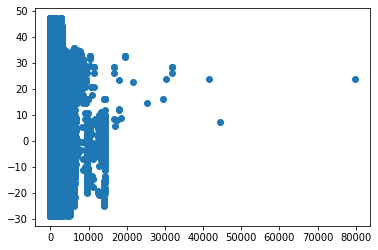

In [24]:
plt.scatter(electricMeter['meter_reading'],electricMeter['air_temperature'])
plt.show()

# Filtering buildings by meter

In [25]:
chilledWaterMeter = data[data['meter']==1]
stemMeter = data[data['meter']==2]
hotWaterMeter = data[data['meter']==3]

# Graph shows the correlation between chilled water meter and air temperature

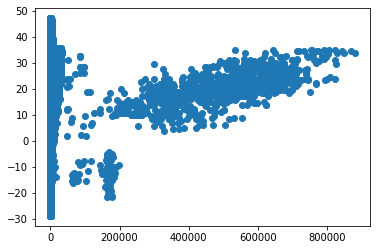

In [26]:
plt.scatter(chilledWaterMeter['meter_reading'],chilledWaterMeter['air_temperature'])
plt.show()

# Graph shows the correlation between stem meter and air temperature

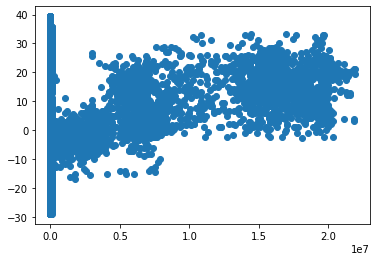

In [27]:
plt.scatter(stemMeter['meter_reading'],stemMeter['air_temperature'])
plt.show()

# Graph shows the correlation between hot water meter and air temperature

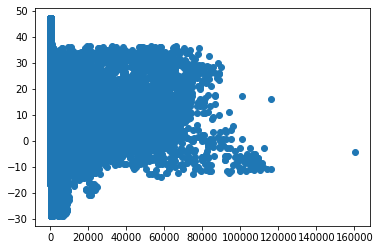

In [28]:
plt.scatter(hotWaterMeter['meter_reading'],hotWaterMeter['air_temperature'])
plt.show()

# Removing outliers

**there are outliers values  in buildings that use electricity meter and hot water**

***Electricity Meter Outliers***

In [29]:
mask1 = data["meter"] == 0
mask2 = data["meter_reading"] > 40000
mask = np.logical_and(mask1, mask2)
print(data.shape)
data[mask]["meter_reading"] = data[mask1]["meter_reading"].mean()

(20216100, 15)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


***Hot water Meter Outliers***

In [30]:
mask1 = data["meter"] == 3
mask2 = data["meter_reading"] > 140000
mask = np.logical_and(mask1, mask2)
print(data.shape)
data[mask]["meter_reading"] = data[mask1]["meter_reading"].mean()
print(data.shape)

(20216100, 15)
(20216100, 15)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Mean of using electricity meter per month 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


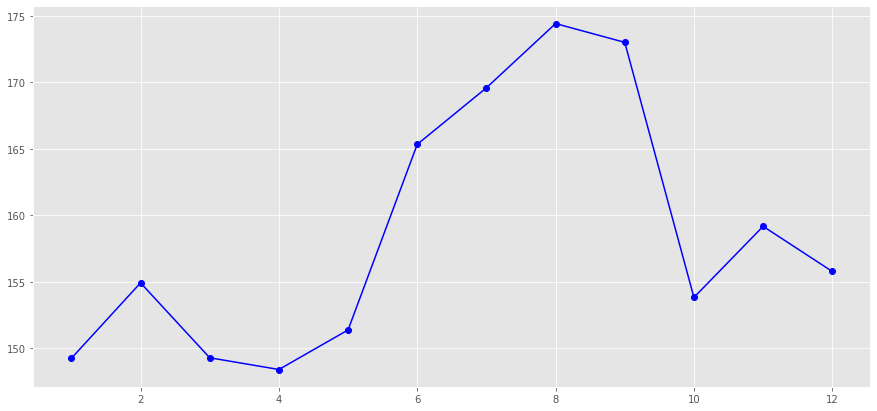

In [31]:
newData = data[data['meter']==0]
newData.index = newData['month']
newData.drop(columns = 'month')
newData.sort_index(inplace = True)
data_to_plot = newData.groupby([newData.index])['month','meter_reading'].mean()
idx = data_to_plot.index
meter = data_to_plot.meter_reading
plt.style.use('ggplot')
plt.figure(figsize = (15,7))
plt.plot(idx,meter,'-bo',label = 'meter_reading')
plt.show()

# Mean of using Chilled Water meter per month 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


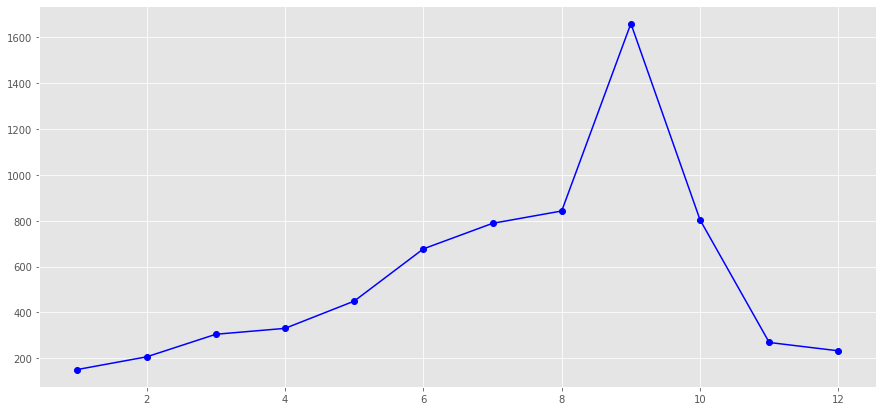

In [32]:
newData = data[data['meter']==1]
newData.index = newData['month']
newData.drop(columns = 'month')
newData.sort_index(inplace = True)
data_to_plot = newData.groupby([newData.index])['month','meter_reading'].mean()
idx = data_to_plot.index
meter = data_to_plot.meter_reading
plt.style.use('ggplot')
plt.figure(figsize = (15,7))
plt.plot(idx,meter,'-bo',label = 'meter_reading')
plt.show()

# Mean of using Stem meter per month 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


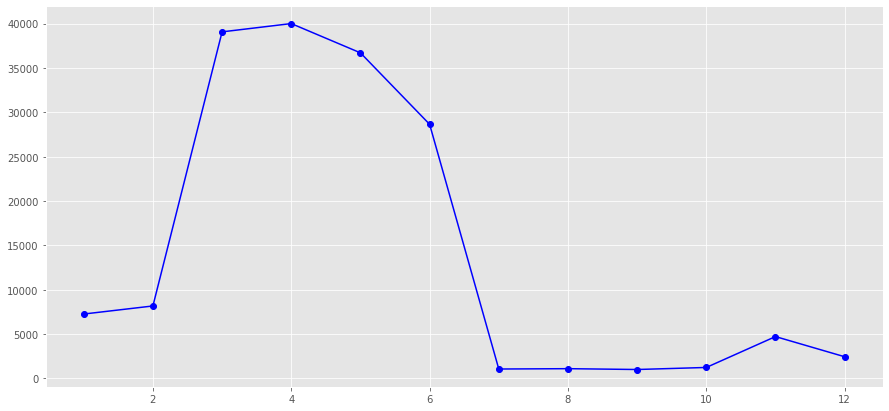

In [33]:
newData = data[data['meter']==2]
newData.index = newData['month']
newData.drop(columns = 'month')
newData.sort_index(inplace = True)
data_to_plot = newData.groupby([newData.index])['month','meter_reading'].mean()
idx = data_to_plot.index
meter = data_to_plot.meter_reading
plt.style.use('ggplot')
plt.figure(figsize = (15,7))
plt.plot(idx,meter,'-bo',label = 'meter_reading')
plt.show()

# Mean of using Hot Water meter per month 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


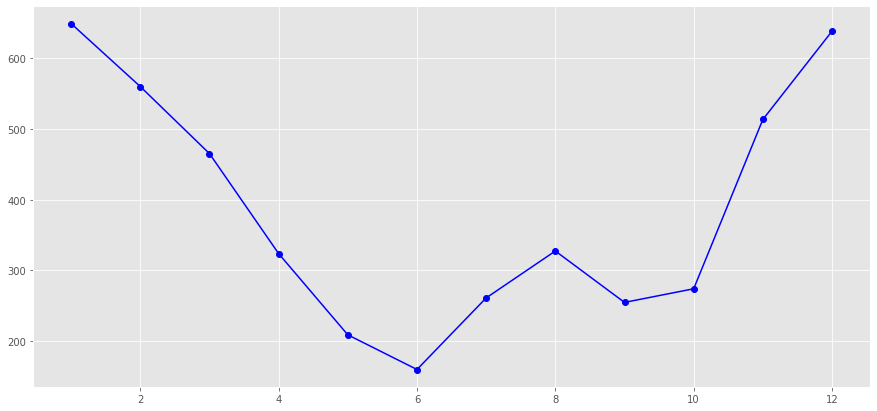

In [34]:
newData = data[data['meter']==3]
newData.index = newData['month']
newData.drop(columns = 'month')
newData.sort_index(inplace = True)
data_to_plot = newData.groupby([newData.index])['month','meter_reading'].mean()
idx = data_to_plot.index
meter = data_to_plot.meter_reading
plt.style.use('ggplot')
plt.figure(figsize = (15,7))
plt.plot(idx,meter,'-bo',label = 'meter_reading')
plt.show()

# Mean of using electricity meter per hour 

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


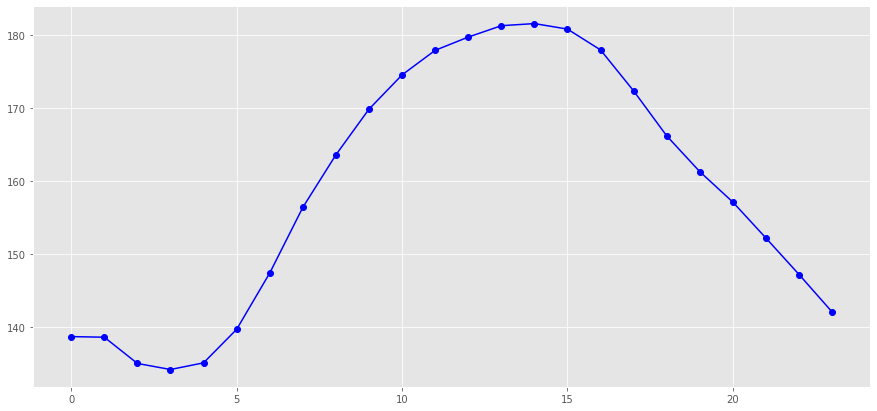

In [35]:
newData = data[data['meter']==0]
newData.index = newData['hour']
newData.drop(columns = 'hour')
newData.sort_index(inplace = True)
data_to_plot = newData.groupby([newData.index])['hour','meter_reading'].mean()
idx = data_to_plot.index
meter = data_to_plot.meter_reading
plt.style.use('ggplot')
plt.figure(figsize = (15,7))
plt.plot(idx,meter,'-bo',label = 'meter_reading')
plt.show()

# Mean of using Chilled Water meter per hour

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


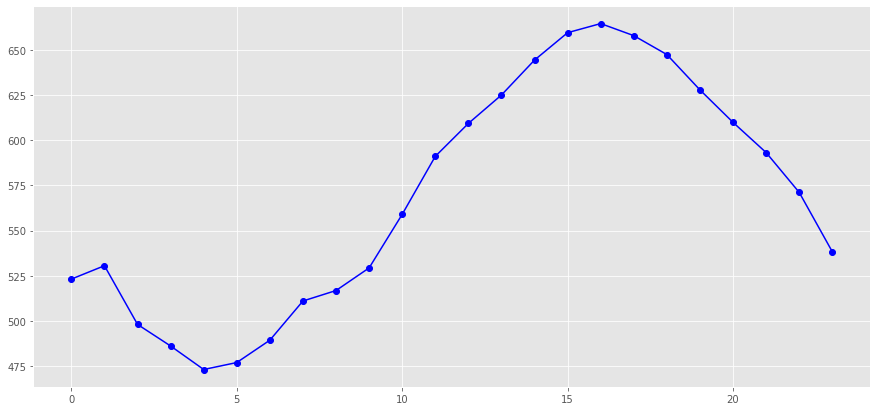

In [36]:
newData = data[data['meter']==1]
newData.index = newData['hour']
newData.drop(columns = 'hour')
newData.sort_index(inplace = True)
data_to_plot = newData.groupby([newData.index])['hour','meter_reading'].mean()
idx = data_to_plot.index
meter = data_to_plot.meter_reading
plt.style.use('ggplot')
plt.figure(figsize = (15,7))
plt.plot(idx,meter,'-bo',label = 'meter_reading')
plt.show()

# Mean of using Stem meter per hour 

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


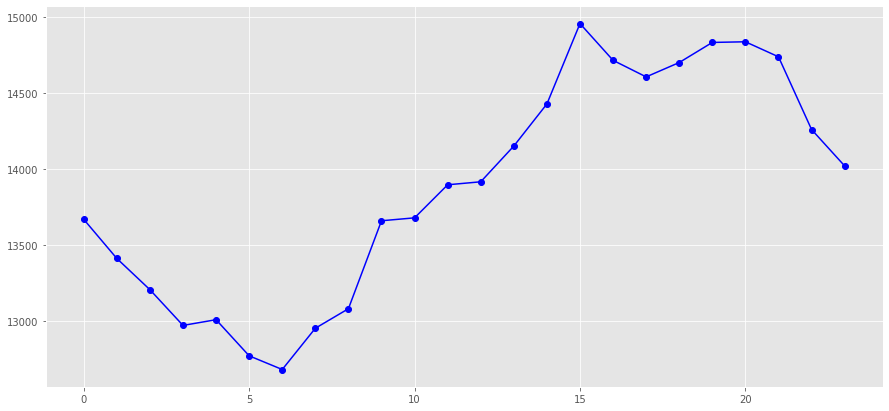

In [37]:
newData = data[data['meter']==2]
newData.index = newData['hour']
newData.drop(columns = 'hour')
newData.sort_index(inplace = True)
data_to_plot = newData.groupby([newData.index])['hour','meter_reading'].mean()
idx = data_to_plot.index
meter = data_to_plot.meter_reading
plt.style.use('ggplot')
plt.figure(figsize = (15,7))
plt.plot(idx,meter,'-bo',label = 'meter_reading')
plt.show()

# Mean of using Hot Water meter per hour

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


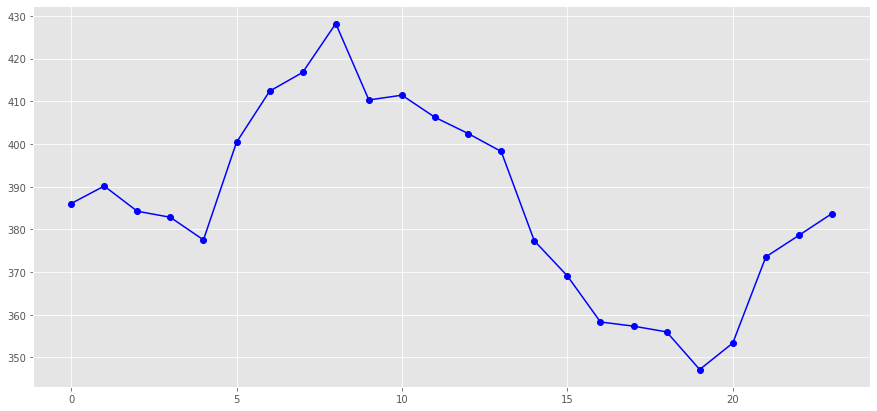

In [38]:
newData = data[data['meter']==3]
newData.index = newData['hour']
newData.drop(columns = 'hour')
newData.sort_index(inplace = True)
data_to_plot = newData.groupby([newData.index])['hour','meter_reading'].mean()
idx = data_to_plot.index
meter = data_to_plot.meter_reading
plt.style.use('ggplot')
plt.figure(figsize = (15,7))
plt.plot(idx,meter,'-bo',label = 'meter_reading')
plt.show()

# Usage of different types of buildings that use Electricity meter

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


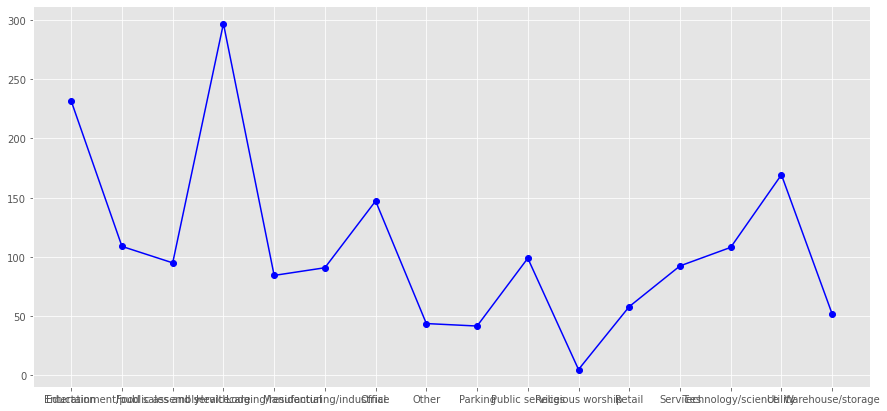

In [39]:
newData = data[data['meter']==0]
newData.index = newData['primary_use']
newData.drop(columns = 'primary_use')
newData.sort_index(inplace = True)
data_to_plot = newData.groupby([newData.index])['primary_use','meter_reading'].mean()
idx = data_to_plot.index
meter = data_to_plot.meter_reading
plt.style.use('ggplot')
plt.figure(figsize = (15,7))
plt.plot(idx,meter,'-bo',label = 'meter_reading')
plt.show()

# Usage of different types of buildings that use Chilled Water meter

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


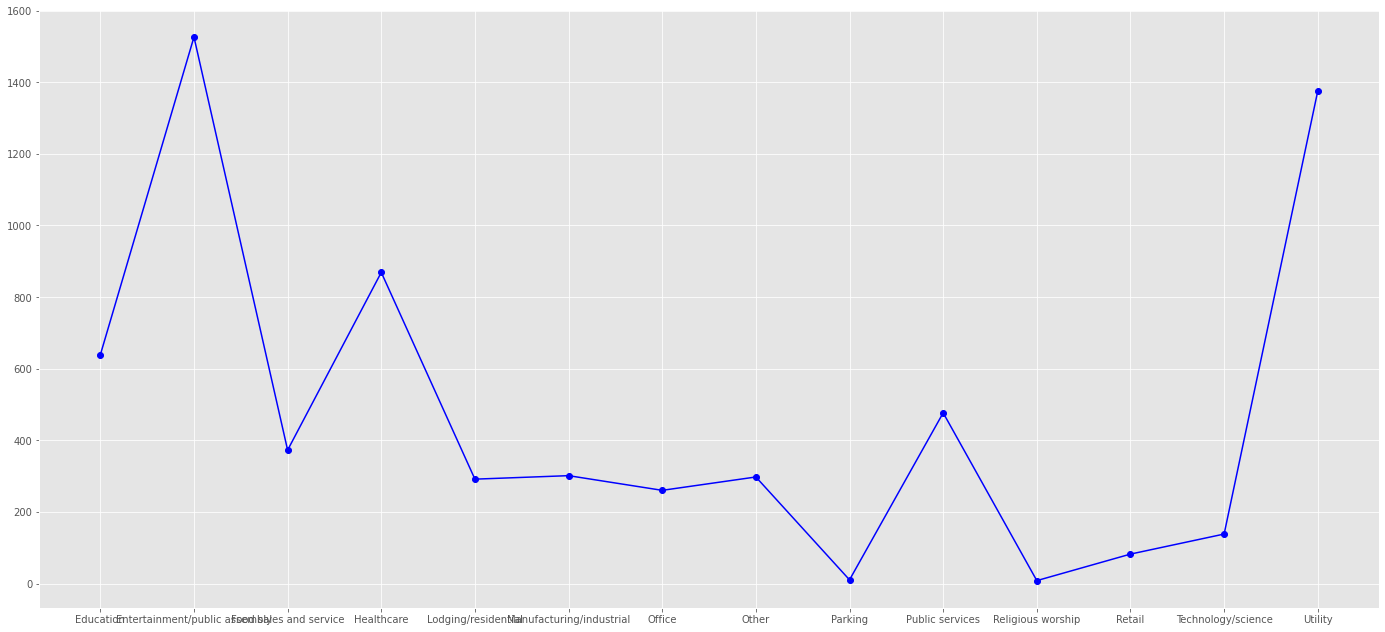

In [40]:
newData = data[data['meter']==1]
newData.index = newData['primary_use']
newData.drop(columns = 'primary_use')
newData.sort_index(inplace = True)
data_to_plot = newData.groupby([newData.index])['primary_use','meter_reading'].mean()
idx = data_to_plot.index
meter = data_to_plot.meter_reading
plt.style.use('ggplot')
plt.figure(figsize = (24,11))
plt.plot(idx,meter,'-bo',label = 'meter_reading')
plt.show()

# Usage of different types of buildings that use Stem meter

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


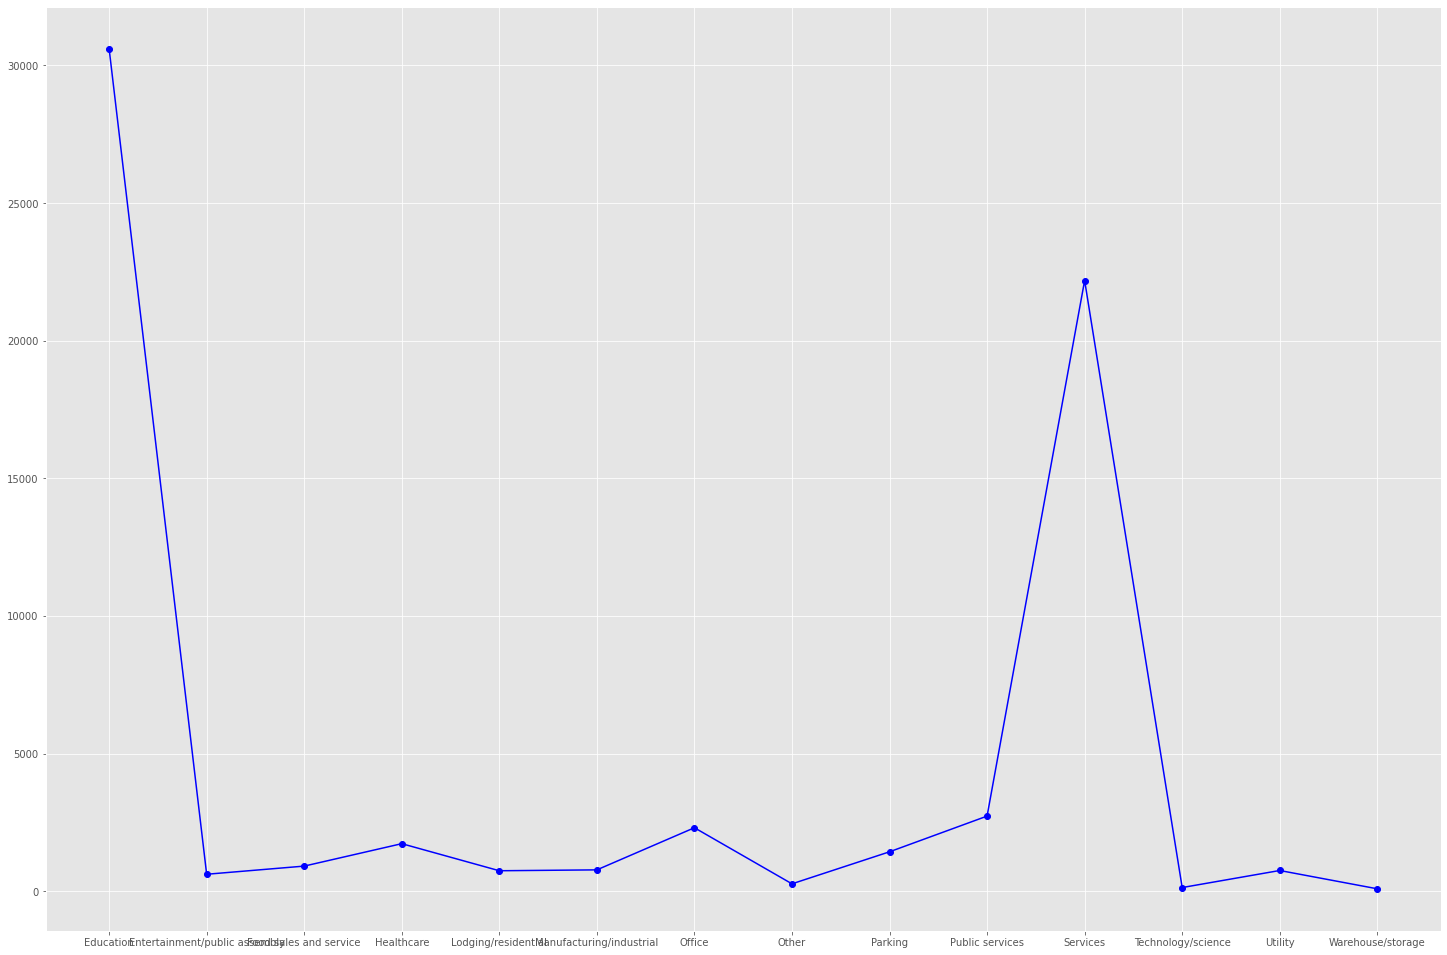

In [41]:
newData = data[data['meter']==2]
newData.index = newData['primary_use']
newData.drop(columns = 'primary_use')
newData.sort_index(inplace = True)
data_to_plot = newData.groupby([newData.index])['primary_use','meter_reading'].mean()
idx = data_to_plot.index
meter = data_to_plot.meter_reading
plt.style.use('ggplot')
plt.figure(figsize = (25,17))
plt.plot(idx,meter,'-bo',label = 'meter_reading')
plt.show()

# Usage of different types of buildings that use Hot Water meter

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


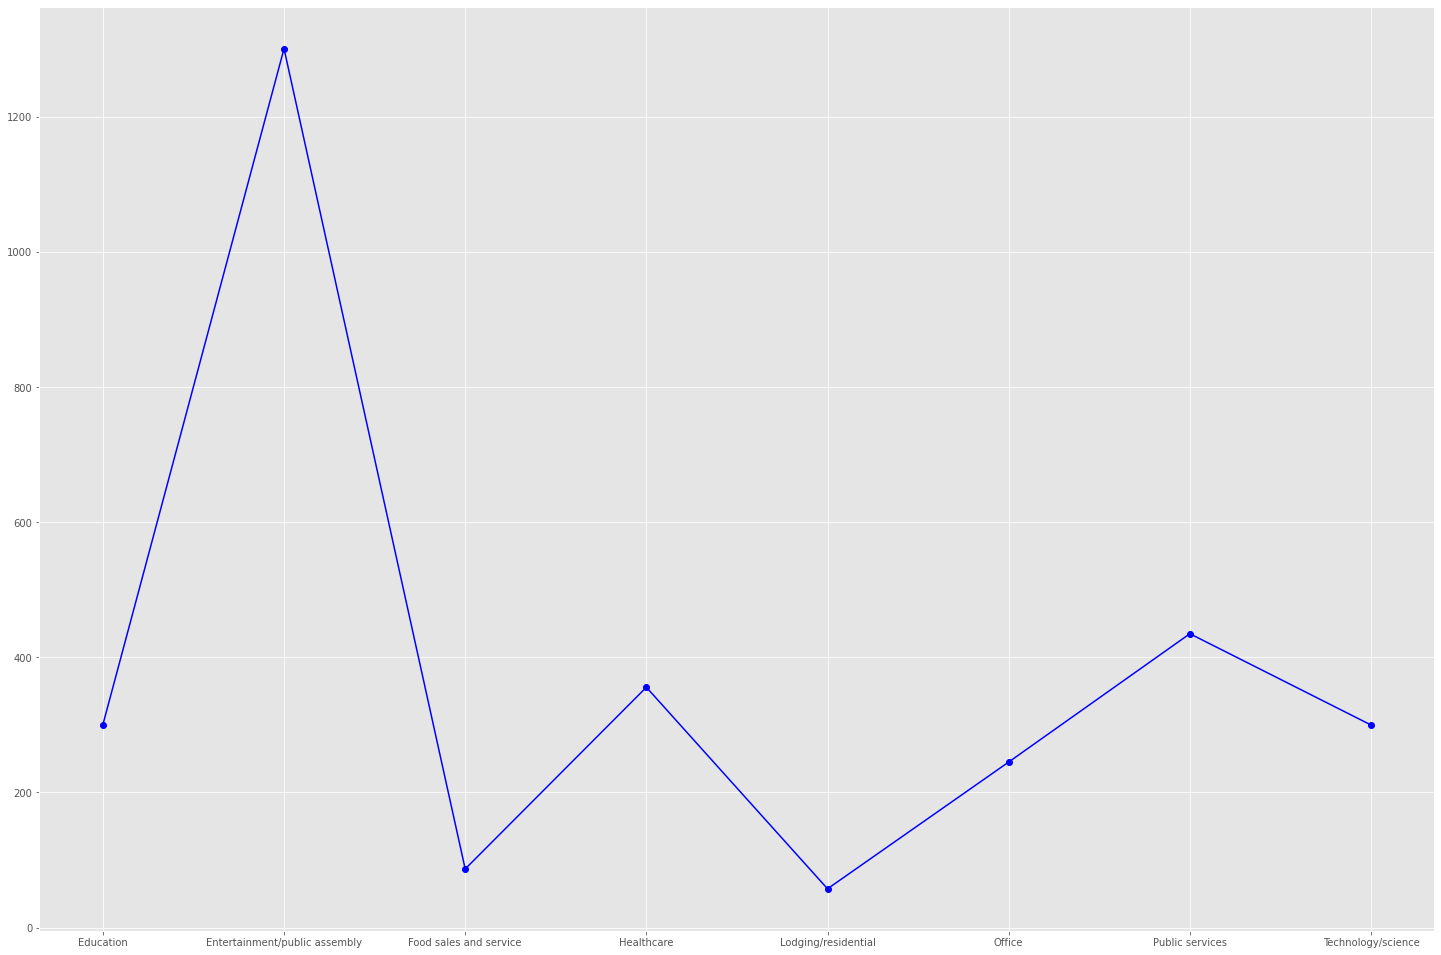

In [42]:
newData = data[data['meter']==3]
newData.index = newData['primary_use']
newData.drop(columns = 'primary_use')
newData.sort_index(inplace = True)
data_to_plot = newData.groupby([newData.index])['primary_use','meter_reading'].mean()
idx = data_to_plot.index
meter = data_to_plot.meter_reading
plt.style.use('ggplot')
plt.figure(figsize = (25,17))
plt.plot(idx,meter,'-bo',label = 'meter_reading')
plt.show()

In [43]:
data.isnull().sum()

building_id          0
meter                0
meter_reading        0
site_id              0
primary_use          0
square_feet          0
air_temperature      0
dew_temperature      0
precip_depth_1_hr    0
wind_speed           0
day                  0
hour                 0
week                 0
month                0
year                 0
dtype: int64

# Converting primary use to numiric

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()
data['primary_use'] = le.fit_transform(data['primary_use'])

In [46]:
data

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,wind_speed,day,hour,week,month,year
0,0,0,0.000,0,0,7432,25.0,20.0,0.796416,0.0,1,0,4,1,2016
1,1,0,0.000,0,0,2720,25.0,20.0,0.796416,0.0,1,0,4,1,2016
2,2,0,0.000,0,0,5376,25.0,20.0,0.796416,0.0,1,0,4,1,2016
3,3,0,0.000,0,0,23685,25.0,20.0,0.796416,0.0,1,0,4,1,2016
4,4,0,0.000,0,0,116607,25.0,20.0,0.796416,0.0,1,0,4,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,8.750,15,1,19619,1.7,-5.6,-1.000000,8.8,31,23,5,12,2016
20216096,1445,0,4.825,15,0,4298,1.7,-5.6,-1.000000,8.8,31,23,5,12,2016
20216097,1446,0,0.000,15,1,11265,1.7,-5.6,-1.000000,8.8,31,23,5,12,2016
20216098,1447,0,159.575,15,4,29775,1.7,-5.6,-1.000000,8.8,31,23,5,12,2016
